In [5]:
# Setup
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
params = {'font.size'     : 14,
          'figure.figsize':(10.0, 6.0),
          'lines.linewidth': 2.,
          'lines.markersize': 8,}
matplotlib.rcParams.update(params)

## Optimization

## Scope

Mathematical optimization aims at solving various kinds of problems by minimizing a function of the form:

$$
f(X) = e
$$

Where $f$ if the **cost function**, $X$ is a $N$ dimensional vector of parameters and $e \in \mathscr R$. More informations about the underlying theory, the nature of the solution(s) and practical considerations can be found:

* On [Wikipedia](https://en.wikipedia.org/wiki/Mathematical_optimization),
* On (excellent) [Scipy lectures](http://www.scipy-lectures.org/advanced/mathematical_optimization/).

## Solving

*Scipy* offers multiple approaches in order to solve optimization problems in its sub package *optimize*

### General purpose approach

[scipy.optimize.minimize](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#unconstrained-minimization-of-multivariate-scalar-functions-minimize) allows one to use multiple general purpose optimization algorithms.


In [ ]:
from scipy import optimize

def f(X):
  """
  Cost function.
  """  
  return (X**2).sum()

X0 = [1.,1.] # Initial guess
sol = optimize.minimize(f, X0, method = "nelder-mead")
X = sol.x
print "Solution: ", X


### Curve fitting using least squares

In order to perform curve fitting in a more convenient way, [scipy.optimize.curve_fit](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) can be used.



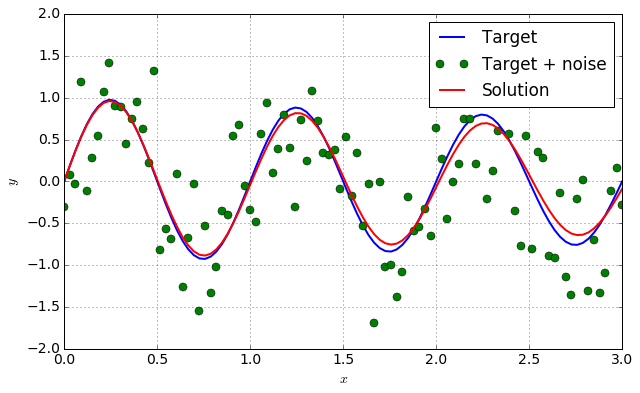

In [22]:
def func(x, omega, tau):
    return np.exp(-x / tau) * np.sin(omega * x)


xdata = np.linspace(0, 3., 100)
y = func(xdata, omega = 2. * np.pi, tau = 10.)
ydata = y + .5 *  np.random.normal(size=len(xdata))

params, cov = optimize.curve_fit(func, xdata, ydata)
omega, tau  = params
ysol = func(xdata, omega, tau) 


fig = plt.figure(0)
plt.clf()
plt.plot(xdata, y, label = "Target")
plt.plot(xdata, ydata, "o", label = "Target + noise")
plt.plot(xdata, ysol, label = "Solution")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()